# Dimensionality Reduction on Gas Turbine Data

Turbine data set from
    https://archive.ics.uci.edu/dataset/551/gas+turbine+co+and+nox+emission+data+set 

The data has the following attributes:

|Variable| Abbreviation |Unit| 
| --- | --- | --- | 
|Ambient temperature| AT| °C| 
|Ambient pressure |AP| mbar| 
|Ambient humidity |AH |% |
|Air filter difference pressure |AFDP| mbar|
|Gas turbine exhaust pressure |GTEP |mbar|
|Turbine inlet temperature |TIT|°C|
|Turbine after temperature |TAT| °C| 
|Compressor discharge pressure |CDP| mbar|
|Turbine energy yield |TEY |MWH|
|Carbon monoxide |CO |mg/m3| 
|Nitrogen oxides |NOx |mg/m3 |

## Preparations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Data Loading and Inspection
We have downloaded the data directly from the UC Irwine web repository; you find it in the same directory as this notebook:

In [3]:
gt12 = pd.read_csv('gt_2012.csv')
gt12

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
7623,10.0370,1022.1,88.531,2.9192,23.641,1083.6,549.91,132.61,11.745,1.6560,76.068
7624,9.8921,1022.2,87.622,2.9415,23.859,1084.9,550.08,133.57,11.869,1.5549,74.930
7625,9.8723,1022.0,86.618,2.9309,23.817,1084.8,549.99,133.50,11.914,1.4093,75.041
7626,10.0260,1022.0,87.301,2.9363,23.831,1084.5,550.01,133.20,11.811,1.3963,74.460


In [4]:
gt12.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000
mean,18.397950,1012.258153,79.074804,4.306717,25.181361,1082.890233,546.263793,132.675552,12.000121,2.361133,68.788965
std,7.661038,6.384291,14.105087,0.831170,4.006825,16.852148,7.331345,15.302140,1.049384,2.474116,10.224937
min,0.522300,985.850000,30.344000,2.087400,18.100000,1024.600000,513.060000,101.150000,9.928600,0.007505,41.777000
25%,12.269250,1008.400000,69.165250,3.882650,23.090750,1075.800000,547.657500,125.240000,11.469750,1.127125,62.531250
50%,19.120500,1012.000000,82.411500,4.298050,25.221000,1089.100000,549.920000,133.760000,12.041000,1.636300,67.246500
75%,24.337250,1016.000000,90.356250,4.670525,26.322250,1093.800000,550.070000,134.900000,12.290000,2.953025,73.424500
max,34.929000,1031.800000,100.200000,7.610600,37.402000,1100.800000,550.530000,174.610000,15.081000,44.103000,119.890000


## Scaling
Scaling the input data increases the stability of the PCA computation, and it allows us to easily interpret the principal components.

In [5]:
myScaler = RobustScaler().fit(gt12)
gt12_sc = myScaler.transform(gt12)

In [6]:
gt12_sc_df = pd.DataFrame(gt12_sc, columns=gt12.columns)
gt12_sc_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.016001,-0.539474,0.678944,-1.012914,-1.719944,-1.661111,0.033161,-1.973085,-1.750686,0.831590,1.420650
1,-1.022166,-0.473684,0.693997,-1.013168,-1.699830,-1.655556,0.033161,-1.971014,-1.759220,0.876280,1.425608
2,-1.012827,-0.421053,0.638361,-1.035253,-1.684048,-1.650000,-0.020725,-1.972050,-1.755562,0.857057,1.397333
3,-0.999635,-0.368421,0.605800,-1.037665,-1.680025,-1.638889,0.029016,-1.971014,-1.749467,0.852182,1.415877
4,-0.971387,-0.302632,0.601128,-1.015961,-1.688380,-1.633333,0.024870,-1.971014,-1.742152,0.882907,1.382921
...,...,...,...,...,...,...,...,...,...,...,...
7623,-0.752693,1.328947,0.288778,-1.750087,-0.488937,-0.305556,-0.004145,-0.119048,-0.360866,0.010789,0.809813
7624,-0.764700,1.342105,0.245883,-1.721783,-0.421476,-0.233333,0.066321,-0.019669,-0.209692,-0.044581,0.705345
7625,-0.766341,1.315789,0.198504,-1.735237,-0.434473,-0.238889,0.029016,-0.026915,-0.154831,-0.124322,0.715535
7626,-0.753605,1.315789,0.230735,-1.728383,-0.430141,-0.255556,0.037306,-0.057971,-0.280402,-0.131442,0.662199


## Plotting some Attribute Pairs

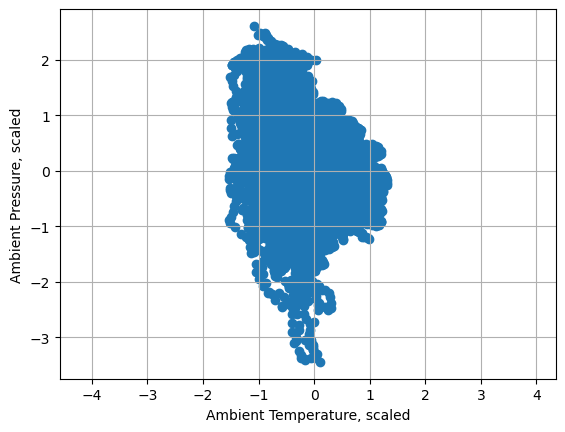

In [7]:
plt.scatter(gt12_sc_df['AT'], gt12_sc_df['AP'])
plt.axis("equal")
plt.xlabel('Ambient Temperature, scaled')
plt.ylabel('Ambient Pressure, scaled')
plt.grid()

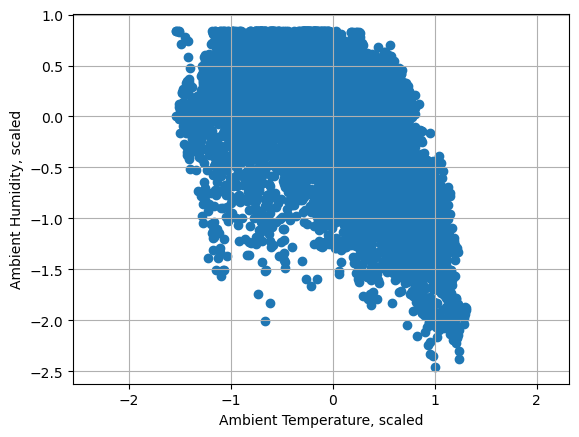

In [8]:
plt.scatter(gt12_sc_df['AT'], gt12_sc_df['AH'])
plt.axis("equal")
plt.xlabel('Ambient Temperature, scaled')
plt.ylabel('Ambient Humidity, scaled')
plt.grid()

## Dimensionality Reduction with PCA
We do a dimensionality reduction based on the first eight attributes and omit the Turbine energy yield (TEY), Carbon monoxide (CO) and Nitrogen oxides (NO). We then add the TEY and the CO and NO concentrations to the data frame so that we can use for color-coding when plotting.

In [9]:
gtpca_noOutput = PCA().fit(gt12_sc_df.loc[: , ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP']])
gtpca_noOutput_trans = gtpca_noOutput.transform(gt12_sc_df.loc[: , ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP']])

In [10]:
gtpca_pca_df = pd.DataFrame(gtpca_noOutput_trans)
gtpca_pca_df.columns = ['comp01', 'comp02', 'comp03', 'comp04', 'comp05', 'comp06', 
                        'comp07', 'comp08' ]
gtpca_pca_df['TEY'] = gt12['TEY']
gtpca_pca_df['CO'] = gt12['CO']
gtpca_pca_df['NOX'] = gt12_sc_df['NOX']

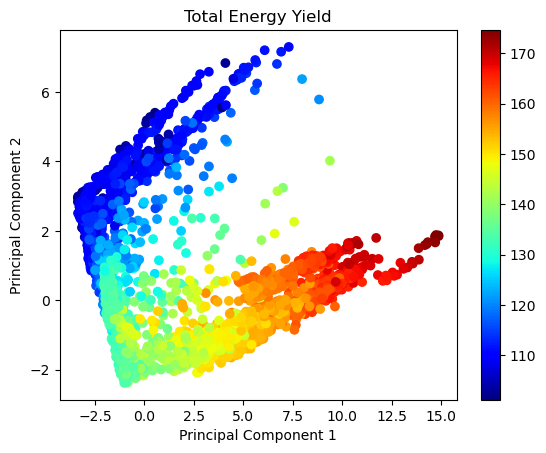

In [11]:
plt.scatter(x=gtpca_pca_df['comp01'], y=gtpca_pca_df['comp02'], c=gtpca_pca_df['TEY'], cmap='jet')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Total Energy Yield')
plt.colorbar()
plt.show()

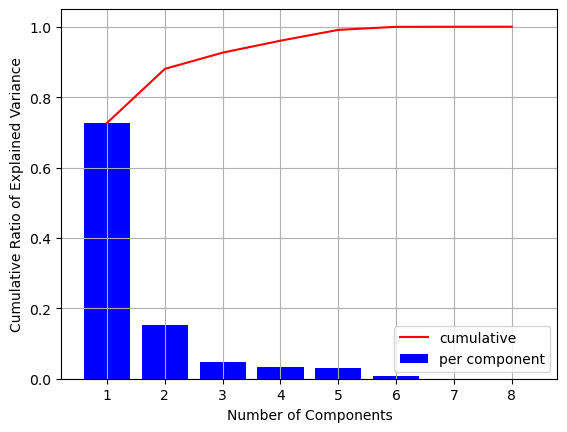

In [12]:
plt.bar(range(1, 1+len(gtpca_noOutput.explained_variance_ratio_)), gtpca_noOutput.explained_variance_ratio_, color='b', label='per component')
plt.plot(range(1, 1+len(gtpca_noOutput.explained_variance_ratio_)), np.cumsum(gtpca_noOutput.explained_variance_ratio_), 'r-', label='cumulative')
plt.grid(True)
plt.legend()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Ratio of Explained Variance')
plt.show()

## Investigating the PCA Components 

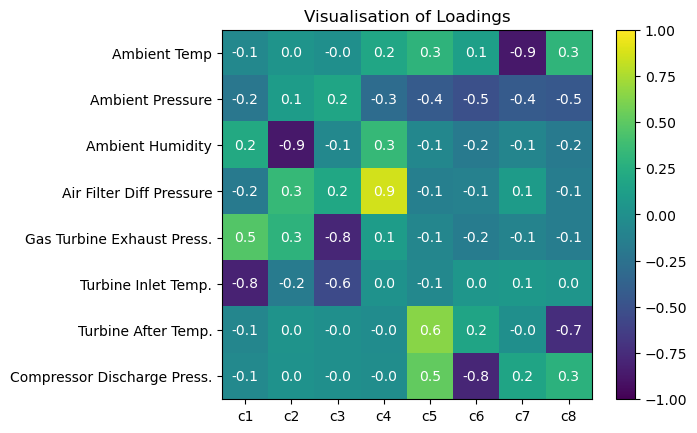

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(gtpca_noOutput.components_, vmin=-1, vmax=1)

components = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8' ]
features = ['Ambient Temp', 'Ambient Pressure', 'Ambient Humidity', 'Air Filter Diff Pressure',
                                       'Gas Turbine Exhaust Press.', 'Turbine Inlet Temp.', 'Turbine After Temp.', 
                                       'Compressor Discharge Press.']

ax.figure.colorbar(im) 

plt.xticks(ticks = range(8), labels = components)
plt.yticks(ticks = range(8), labels = features)
plt.grid(False)

# Loop over data dimensions and create text annotations.
for i in range(len(components)):
    for j in range(len(features)):
        text = ax.text(i, j, np.round(gtpca_noOutput.components_[j, i], 1),
                       ha="center", va="center", color="w")
plt.title('Visualisation of Loadings')
plt.show()

Principal compontent 1 seems to be driven by cold inlet temperature and rather high Turbine exhaust pressure. Component 2 is mostly showing low ambient humidity, and component 3 low turbine exhaust pressure.